In [1]:
import numpy as np
import pandas as pd
import shap
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('aggregated_data.csv')

In [3]:
df = df[['NUTRIENTES (POC)_max', 'NUTRIENTES (POC)_mean',
       'NUTRIENTES (POC)_median', 'NUTRIENTES (POC)_min',
       'NUTRIENTES (POC)_std', 'RADIACAO(PAR)_max', 'RADIACAO(PAR)_mean',
       'RADIACAO(PAR)_median', 'RADIACAO(PAR)_min', 'RADIACAO(PAR)_std',
       'TEMPERATURA_max', 'TEMPERATURA_mean', 'TEMPERATURA_median',
       'TEMPERATURA_min', 'TEMPERATURA_std', 'block', 'date', 'clorofila_mean']]

In [4]:
df = df.loc[df.block == 110] #área perto da frança

In [5]:
df.pop('date')
df.pop('block')

328      110.0
329      110.0
330      110.0
835      110.0
836      110.0
         ...  
45959    110.0
45960    110.0
46465    110.0
46466    110.0
46467    110.0
Name: block, Length: 276, dtype: float64

In [6]:
y = df.pop('clorofila_mean')
X = df

In [7]:
shap.initjs()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

In [9]:
model = CatBoostRegressor(
    iterations=5000,
)
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Model is fitted: True
Model params:
{'loss_function': 'RMSE', 'iterations': 5000}


In [10]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [11]:
shap.force_plot(explainer.expected_value, shap_values, X)

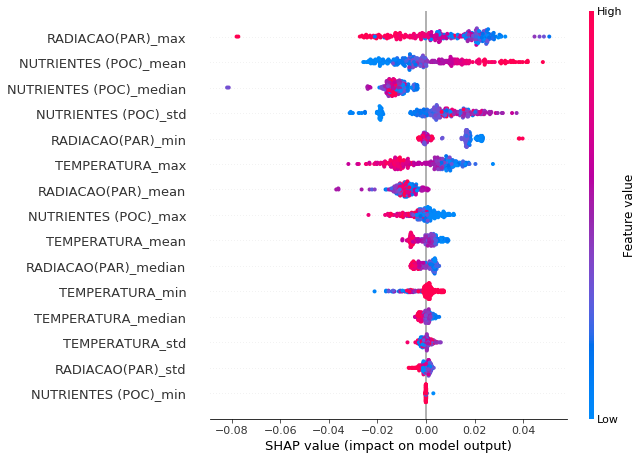

In [12]:
shap.summary_plot(shap_values, X)